# Matplotlib 와 Pandas 연습 - 20개

matplotlib 와 pandas 를 사용해서 데이터세트를 가시화해서 살펴보자

데이터세트:

1. [mtcars 데이터 세트](#mtcars-데이터-세트)
2. [코로나 주요 발행국 데이터](#코로나-주요-발행국-데이터)


## 0. numpy, pandas, seaborn, matplotlib.pyplot 을 import 한다.

In [1]:
#-*- coding: utf-8 -*-
%matplotlib inline

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
import matplotlib.font_manager as fm

# 폰트 목록에서 폰트 찾기
for font in fm.fontManager.ttflist:
    if 'Nanum' in font.name:
        print(font.name, font.fname)

NanumSquare C:\Users\daddy\AppData\Local\Microsoft\Windows\Fonts\NanumSquareR.ttf
NanumGothicCoding C:\Users\daddy\AppData\Local\Microsoft\Windows\Fonts\NanumGothicCoding-Bold.ttf
NanumSquare_ac C:\Users\daddy\AppData\Local\Microsoft\Windows\Fonts\NanumSquare_acR.ttf
NanumSquare C:\Users\daddy\AppData\Local\Microsoft\Windows\Fonts\NanumSquareL.ttf
NanumSquare C:\Users\daddy\AppData\Local\Microsoft\Windows\Fonts\NanumSquareEB.ttf
NanumSquare C:\Users\daddy\AppData\Local\Microsoft\Windows\Fonts\NanumSquareB.ttf
NanumGothic C:\Users\daddy\AppData\Local\Microsoft\Windows\Fonts\NanumGothic.ttf
NanumGothic C:\Users\daddy\AppData\Local\Microsoft\Windows\Fonts\NanumGothicLight.ttf
NanumGothicCoding C:\Users\daddy\AppData\Local\Microsoft\Windows\Fonts\NanumGothicCoding.ttf
NanumGothic C:\Users\daddy\AppData\Local\Microsoft\Windows\Fonts\NanumGothicExtraBold.ttf
NanumSquare_ac C:\Users\daddy\AppData\Local\Microsoft\Windows\Fonts\NanumSquare.ttf
NanumGothic C:\Users\daddy\AppData\Local\Microsoft\

Text(0.5, 1.0, '한글 타이틀...')

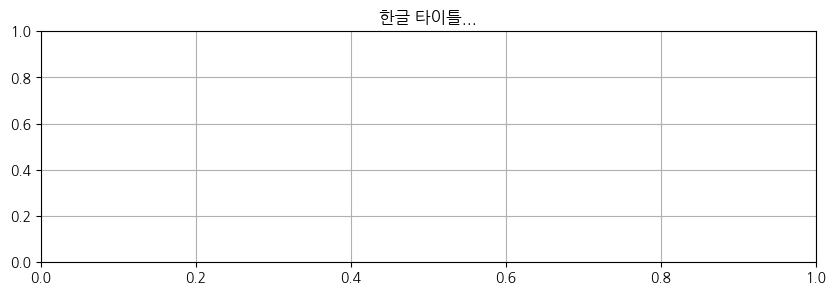

In [4]:
# 전역 폰트 설정 사용
font_path = 'C:/Windows/Fonts/NanumGothic.ttf'
# font_path = '/Users/qkboo/Library/Fonts/NanumGothic.otf'
# font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
fontname = fm.FontProperties(fname=font_path, size=18).get_name()  # 폰트 패밀리 이름!
# plt.rcParams["font.family"] = fontname
plt.rc('font', family=fontname)  #  

# matplotlib 설정
plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (10,3)
plt.rcParams["axes.formatter.useoffset"] = False
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["axes.formatter.limits"] = -10000, 10000

plt.title('한글 타이틀...')

In [ ]:
np.set_printoptions(precision=4)
#pd.options.display.max_rows = 20

# mtcars 데이터 세트

mtcars.txt 는

- model: 차명 
- mpg: 주행 연비(갤런당 주행 마일)
- cyl: 실린더 개수
- disp: 배기량(리터)
- hp: 마력수
- drat: 뒤 축 비율(Rear axle ratio)
- wt: 무게(1000파운드 단위)
- qsec: 1/4 마일 가는데 걸리는 시간(추)
- vs: 엔진방식
- am: 변속기 방식
- gear: 기어 개수
- carb:  캬뷰레터 개수
- drv: 구동방식(f:전륜, r후륜, 4:4륜)

## Q1. 주어진 mtcars.csv 를 데이터프레임으로 가져온다.

 - data url: https://gist.github.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv

In [5]:
mtcars = pd.read_csv('https://gist.github.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv')
mtcars.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [6]:
mtcars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   model   32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


## Q2. 연비 mpg 컬럼을 라인그래프로 그려보자.
 - 타이틀: 자동차 연비

In [10]:
mtcars['mpg'].shape

(32,)

In [16]:
mtcars.columns

Index(['model', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am',
       'gear', 'carb'],
      dtype='object')

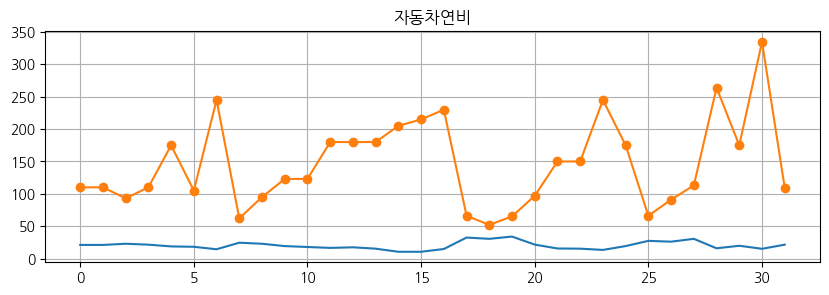

In [17]:
# plt.plot(mtcars['mpg'])
# plt.plot(mtcars['mpg'], '-o')
# plt.plot(mtcars['mpg'], '^', mtcars['mpg'], '-')


plt.plot(mtcars['mpg'])
plt.plot(mtcars['hp'], '-o')


# plt.plot(mtcars['mpg'].values)
plt.title('자동차연비')
plt.show()

연비 mpg 컬럼을 Dataframe 에서 라인그래프로 그래고 타이틀은 '자동차 연비'로 출력하자.

<AxesSubplot: title={'center': '자동차연비'}>

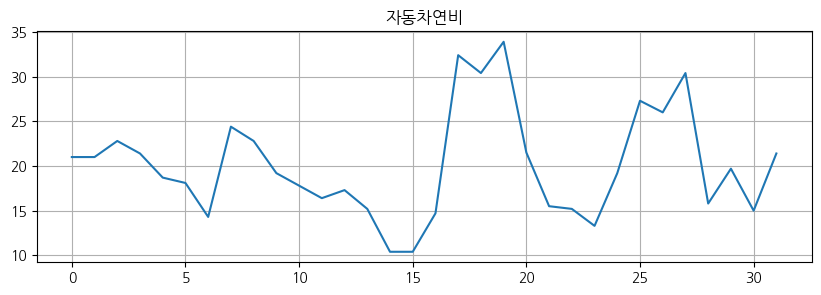

In [18]:
mtcars['mpg'].plot(title='자동차연비')

<AxesSubplot: title={'center': '자동차연비'}>

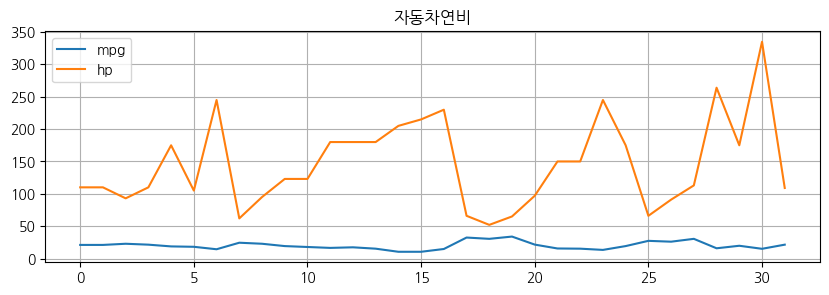

In [19]:
mtcars[['mpg','hp']].plot(title='자동차연비')

## Q3. 연비 mpg 와 마력 hp 컬럼을 data 로 추출해서 슬라이싱으로 10개 데이터를 출력한다.


In [20]:
data = mtcars[['mpg', 'hp']]
data[:5]

,mpg,hp
0,21.0,110
1,21.0,110
2,22.8,93
3,21.4,110
4,18.7,175


mpg, hp 컬럼에 대한 기본통계 표를 출력하자

In [21]:
data.describe()

,mpg,hp
count,32.000000,32.000000
mean,20.090625,146.687500
std,6.026948,68.562868
min,10.400000,52.000000
25%,15.425000,96.500000
50%,19.200000,123.000000
75%,22.800000,180.000000
max,33.900000,335.000000


<AxesSubplot: >

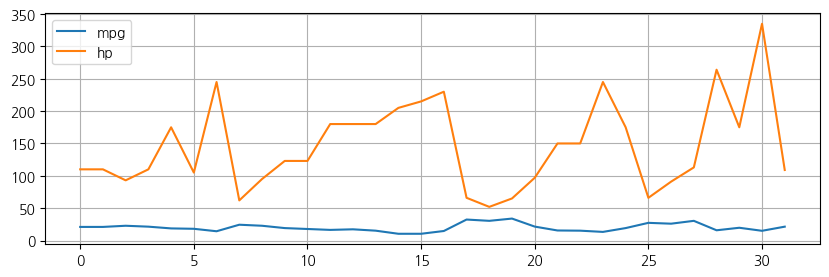

In [22]:
data.plot()  # mtcars[['mpg','hp']].plot(title='자동차연비')

## Q4. 두 컬럼 mpg, hp 의 데이터의 값 차이를 값 / 총합 식으로 계산해 일반화한다.

In [28]:
a = np.array([1,2,3,4,5,6,7,8,90])
a

array([ 1,  2,  3,  4,  5,  6,  7,  8, 90])

In [29]:
a / sum(a)

array([0.00793651, 0.01587302, 0.02380952, 0.03174603, 0.03968254,
       0.04761905, 0.05555556, 0.06349206, 0.71428571])

In [30]:
# 간단한 일반화를 위해서 데이터 합으로 나눈 값을 사용.
data = data / data.sum().astype(float)   # min-max scaler
data[:5]

,mpg,hp
0,0.032664,0.023434
1,0.032664,0.023434
2,0.035464,0.019813
3,0.033287,0.023434
4,0.029087,0.037282


<AxesSubplot: >

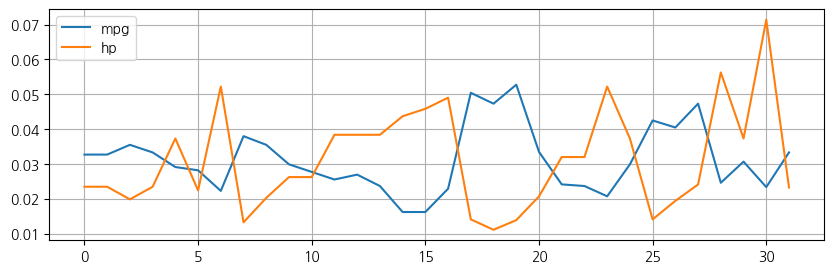

In [31]:
data.plot()

총합한 결과의 통계표를 출력하고 앞에서 출력한 원본 값과 비교해 보자


In [12]:
data.describe()

,mpg,hp
count,32.000000,32.000000
mean,0.031250,0.031250
std,0.009375,0.014606
min,0.016177,0.011078
25%,0.023993,0.020558
50%,0.029865,0.026204
75%,0.035464,0.038347
max,0.052730,0.071368


## Q5. mpg, hp 의 산점도를 그려보자

데이터 주행거리와 마력으로 산점도를 그려보자

In [32]:
data = mtcars[['mpg', 'hp']]

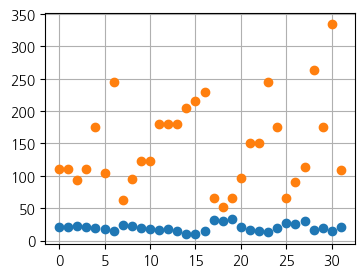

In [33]:
plt.figure(figsize=(4,3))
plt.plot(data, 'o')

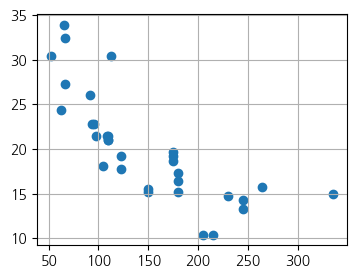

In [34]:
plt.figure(figsize=(4,3))
plt.scatter(x=data.hp, y=data.mpg)
plt.show()

`plt.style.available` 를 사용해서 플로팅 스타일을 바꿔 보자

In [35]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

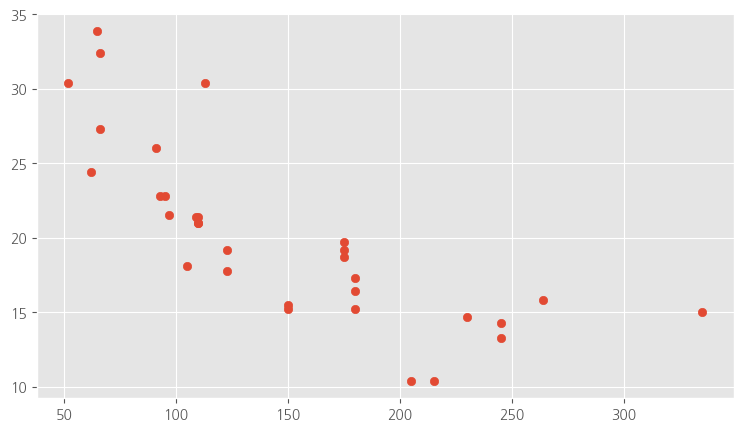

In [37]:
plt.style.use('ggplot') # ggplot, classic...

plt.figure(figsize=(9,5))
plt.scatter(x=data.hp, y=data.mpg)
plt.show()

## Q6. mpg, hp 의 산점도를 데이터 프레임으로 그려보자

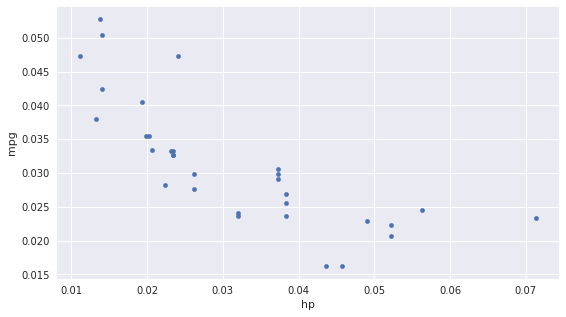

In [13]:
# dataframe
data.plot(x='hp', y='mpg', kind='scatter', figsize=(9,5))
plt.show()

## Q7. 데이터 정규화를 위해서 다음 식을 mpg, hp 의 데이터 프레임 data 에 적용해 보자

$$
\mbox{표준편차 일반화} = \frac{\text{전체데이터 - 데이터평균}}{데이터 표준편차}
$$

In [38]:
data = mtcars[['mpg', 'hp']]

In [39]:
data_scaled = (data - data.mean()) / data.std()
data_scaled[:5]

,mpg,hp
0,0.150885,-0.535093
1,0.150885,-0.535093
2,0.449543,-0.783040
3,0.217253,-0.535093
4,-0.230735,0.412942


In [40]:
data_scaled.min(), data_scaled.max()

(mpg   -1.607883
 hp    -1.381032
 dtype: float64,
 mpg    2.291272
 hp     2.746567
 dtype: float64)

In [31]:
data_scaled.describe()

,mpg,hp
count,3.200000e+01,3.200000e+01
mean,-4.996004e-16,2.775558e-17
std,1.000000e+00,1.000000e+00
min,-1.607883e+00,-1.381032e+00
25%,-7.741273e-01,-7.319924e-01
50%,-1.477738e-01,-3.454858e-01
75%,4.495434e-01,4.858679e-01
max,2.291272e+00,2.746567e+00


## Q8. 위 정규화 식을 데이터프레임을 매개변수로 전달나는 `std_norm(dataframe)` 함수로 작성해 보자.
 - mpg, hp 의 데이터 프레임 data 시용


In [14]:
def std_norm(df):
    for col in df.columns:
        _mean = df[col].mean()
        _std = df[col].std()
        df[col] =  df[col].apply(lambda x: (x - _mean) / _std)
    return df

In [17]:
std_norm

<function __main__.std_norm(df)>

In [16]:
data_scaled = std_norm(data)
data_scaled[:10]

,mpg,hp
0,0.150885,-0.535093
1,0.150885,-0.535093
2,0.449543,-0.783040
3,0.217253,-0.535093
4,-0.230735,0.412942
5,-0.330287,-0.608019
6,-0.960789,1.433903
7,0.715018,-1.235180
8,0.449543,-0.753870
9,-0.147774,-0.345486


## Q9. 중량 wt 와 연비 mpg 의 산점도를 `figure.add_subplot()` 으로 1x1 의 AXES 에 그려보자.
 - axes 의 타이틀 함수로 제목 지정
 - axes 의 xlabel, ylabe 함수로 축 라벨을 출력한다.

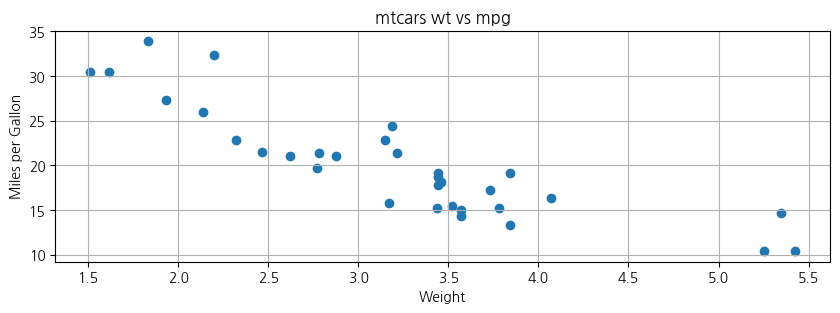

In [18]:
# 연비(mpg)와 중량(wt)으로 산점도 그리기
scatter_fig = plt.figure() 
scatter_axe = scatter_fig.add_subplot(1, 1, 1)
# 산점도 그리기
scatter_axe.scatter(mtcars['wt'], mtcars['mpg']) # x -> 중량, y -> 연비
scatter_axe.set_title("mtcars wt vs mpg")
scatter_axe.set_xlabel("Weight")
scatter_axe.set_ylabel("Miles per Gallon")
plt.show()

## Q10. mtcars 전체 데이터 프레임의 상관계수 표를 출력한다.
 - 단, 수치형식만 연산하도록 numeric_only 파라메터를 지정한다.

In [45]:
np.corrcoef( np.array([1,2,3]), np.array([5,59, 9]))

array([[1.        , 0.06647001],
       [0.06647001, 1.        ]])

In [46]:
# 상관 계수
mtcars.corr(numeric_only=True) # 상관 계수표

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


## Q11 mtcars 데이터 프레임의 연비 mpg 와 중량 wt 의 상관계수를 계산해 출력한다.

In [23]:
# 중량과 연비의 상관 계수
print("상관 계수(wt vs mpg):", mtcars.wt.corr(mtcars.mpg)) # 역상관

상관 계수(wt vs mpg): -0.8676593765172281


또한 반대로 mtcars 데이터 프레임의 연비 mpg 와 중량 wt 의 상관계수를 계산해 출력한다.

In [22]:
print("상관 계수(mpg vs wt):", mtcars.mpg.corr(mtcars.wt)) # 역상관

상관 계수(wt vs mpg): -0.8676593765172281


## Q12 계산한 상관계수표를 seaborn 의 heatmap 으로 출력해 보자.
 - figsize=(10,8) 지정
 - 출력시 상관계수 값을 함께 출력하게 하자

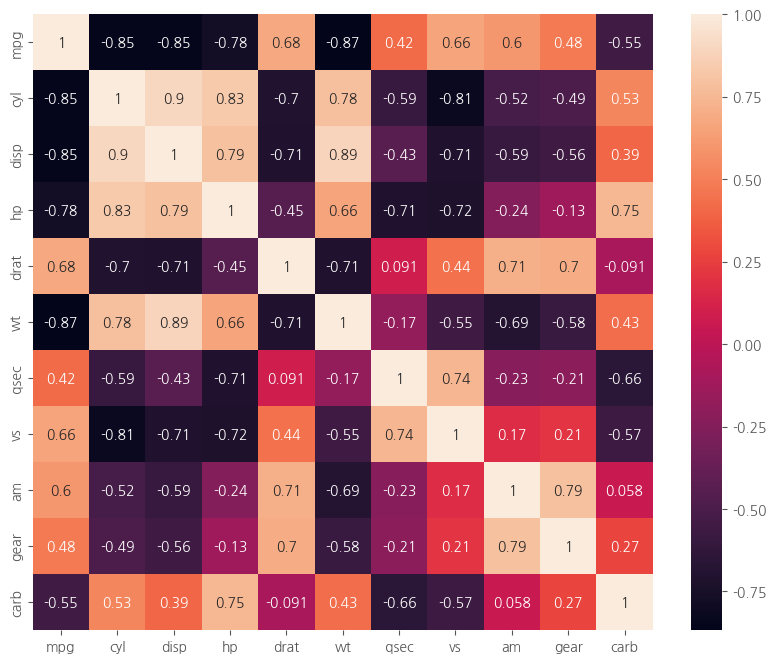

In [47]:
# 상관 계수
corrs = mtcars.corr(numeric_only=True) # 상관 계수표
plt.figure(figsize=(10, 8))
sns.heatmap(corrs, annot=True)
plt.show()

## Q13. 중량 wt 와 연비 mpg 의 사분위수를 계산해 보자.

- 25/50/70% 를 한번에 출력
- 숫자만 연산하도록 매개변수 지정

In [48]:
# 분위수의 확인
quart = mtcars.quantile([0.25, 0.5, 0.75], numeric_only=True) # 25%, 50%, 75
quart

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0.25,15.425,4.0,120.825,96.5,3.080,2.58125,16.8925,0.0,0.0,3.0,2.0
0.50,19.200,6.0,196.300,123.0,3.695,3.32500,17.7100,0.0,0.0,4.0,2.0
0.75,22.800,8.0,326.000,180.0,3.920,3.61000,18.9000,1.0,1.0,4.0,4.0


연비 mpg 컬럼의 IQR 을 구해보자
 - IQR = Q3 - Q1 (75% - 25%)

In [49]:
first_quartile = mtcars['mpg'].quantile(0.25) # mpg의 1사분위수
third_quartile = mtcars['mpg'].quantile(0.75) # mpg의 3사분위수

iqr = third_quartile - first_quartile
print("mpg의 IQR:", iqr)

mpg의 IQR: 7.375


위에서 구한 IQR 의 상 극단치, 하단 극단치 범위를 IQR * 1.5 의 +- 로 계산해 출력해 봐.

In [50]:
# 상단 극단치 경계 : 3사분위값 + IQR * 1.5
# 하단 극단치 경계 : 1사분위값 - IQR * 1.5
top_border = third_quartile + iqr * 1.5 
bottom_border = first_quartile - iqr * 1.5
print("상단 극단치 경계:", top_border)
print("하단 극단치 경계:", bottom_border)

상단 극단치 경계: 33.8625
하단 극단치 경계: 4.362500000000001


## Q14. 위 결과에서 연비 mpg 컬럼에서 상단 극단치 IQR 보다 큰 값을 가진 데이터를 출력하자.

In [51]:
# 상단 극단치 경계를 넘는 자동차 추출
mpg_outlier = mtcars[mtcars['mpg'] > top_border] # 불린 추출
mpg_outlier

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
19,Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.9,1,1,4,1


## Q15. 중량 wt 와 연비 mpg 의 boxplot 을 matplotlib 함수로 출력해 보자.
 - matplotlib 


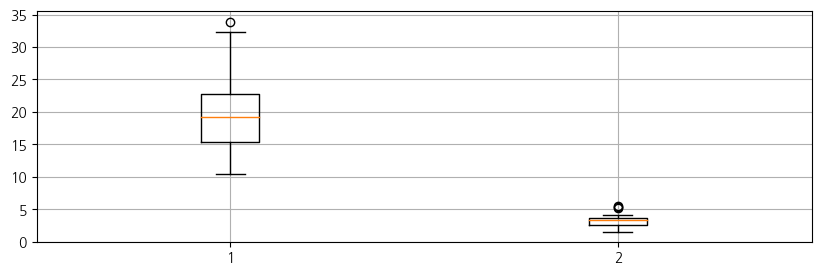

In [28]:
# mtcars의 연비 정보(mpg)
boxplot = plt.figure()
boxplot_axe = boxplot.add_subplot(1, 1, 1)
boxplot_axe.boxplot([mtcars['mpg'], mtcars['wt']])
plt.show()

중량 wt 와 연비 mpg 의 boxplot 을 seaborn 함수로 출력해 보자.
 - seaborn 

<AxesSubplot: >

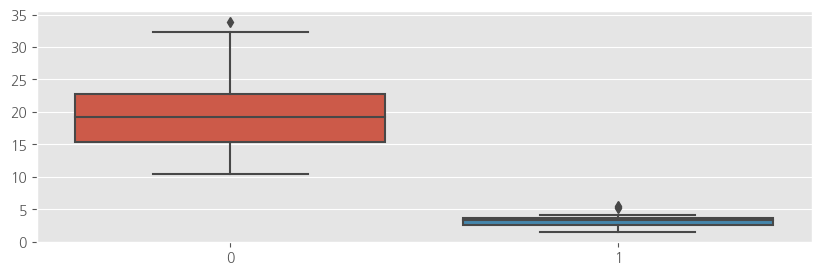

In [52]:
sns.boxplot([mtcars['mpg'], mtcars['wt']])

In [ ]:
sns.boxplot()

# 코로나 주요 발행국 데이터
 - data url: https://github.com/qkboo/Lecture_DA22/raw/master/notebooks/%EC%A3%BC%EC%9A%94%EB%B0%9C%EC%83%9D%EA%B5%AD%EA%B0%80%EC%A3%BC%EA%B0%84%EB%8F%99%ED%96%A5(4%EC%9B%942%EC%A7%B8%EC%A3%BC).csv
 - 참고: 데이터 시각화, 2021, 아이콕스북

## Q16. 위 data url 에서 데이터를 읽는다.

In [35]:
covid = pd.read_csv('https://github.com/qkboo/Lecture_DA22/raw/master/notebooks/%EC%A3%BC%EC%9A%94%EB%B0%9C%EC%83%9D%EA%B5%AD%EA%B0%80%EC%A3%BC%EA%B0%84%EB%8F%99%ED%96%A5(4%EC%9B%942%EC%A7%B8%EC%A3%BC).csv')
covid.head()

,국가,4월06일,4월07일,4월08일,4월09일,4월10일,4월11일,4월12일
0,미국,335524,364723,387547,424945,461437,495535,524903
1,스페인,130709,135032,140510,146690,152446,157022,161852
2,이탈리아,128948,132547,135586,139422,143626,147577,152271
3,독일,100024,102453,107591,112113,118181,122171,124908
4,프랑스,70478,74390,78167,82048,86334,90276,93790


## Q17. covid 데이터프레임의 '국가' 컬럼을 인덱스로 지정하자. 단 covid 자체에 inplace 하게 해보자.

In [36]:
covid.set_index('국가', inplace=True)
covid.head()

,4월06일,4월07일,4월08일,4월09일,4월10일,4월11일,4월12일
국가,,,,,,,
미국,335524,364723,387547,424945,461437,495535,524903
스페인,130709,135032,140510,146690,152446,157022,161852
이탈리아,128948,132547,135586,139422,143626,147577,152271
독일,100024,102453,107591,112113,118181,122171,124908
프랑스,70478,74390,78167,82048,86334,90276,93790


특정 일자의 발생 데이터

In [23]:
plt.style.use('ggplot') # ggplot, seaborn, classic...

## Q18. 4월7일 발생 건수를 라인그래프로 그려보자
 - 제목은 '4월07일 발생 건수' 라고 하자.

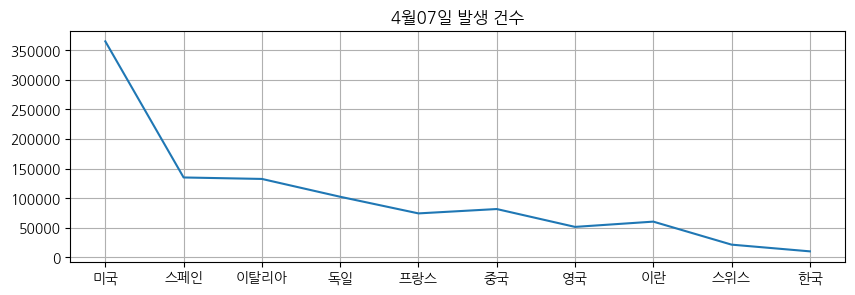

In [41]:
plt.plot(covid['4월07일'])
plt.title('4월07일 발생 건수')
# plt.grid(True)
# plt.xlabel('국가명')
# plt.ylabel('발생건수')
plt.show()

4월12일 발생 건수를 라인그래프에 마커를 'o' 로 출력해 보자. 또한 그리드 표시를 제거하자.

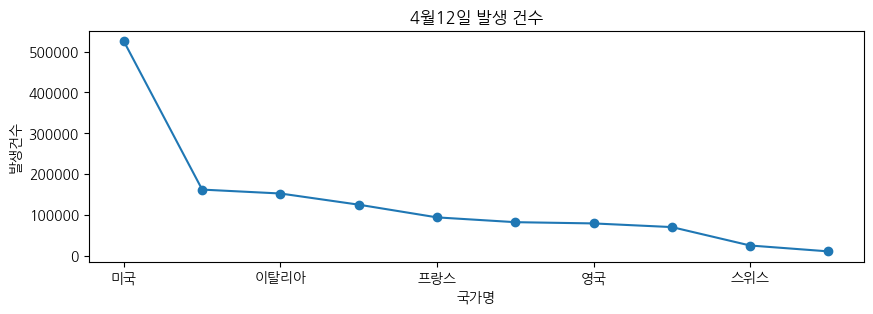

In [42]:
covid['4월12일'].plot(title='4월12일 발생 건수', marker='o')
plt.grid(False)
plt.xlabel('국가명')
plt.ylabel('발생건수')
plt.show()

## Q19. 특정 국가의 특정 일자의 데이터프레임 contries 에 추출해서 앞의 5개를 출력
 - 국가: '스페인','프랑스','독일', '중국', '영국', '이란'
 - 일자: '4월06일','4월07일','4월08일','4월09일','4월10일'

In [44]:
contries = covid.loc[['스페인','프랑스','독일', '중국', '영국', '이란'], ['4월06일','4월07일','4월08일','4월09일','4월10일']]
contries.head()

,4월06일,4월07일,4월08일,4월09일,4월10일
국가,,,,,
스페인,130709,135032,140510,146690,152446
프랑스,70478,74390,78167,82048,86334
독일,100024,102453,107591,112113,118181
중국,81708,81740,81802,81865,81907
영국,47806,51608,55242,60733,65077


## Q20. 앞서 저장한 countries 데이터프레임의 행-열의 위치를 서로 바꾸고 라인 그래프를 그려보자.
 - 마커 : 'o'
 - 제목: '일자별 국가명 꺽은 선'
 - 범례 표시: 컬럼이름 사용

In [53]:
contries = contries.T
contries

국가,스페인,프랑스,독일,중국,영국,이란
4월06일,130709,70478,100024,81708,47806,58226
4월07일,135032,74390,102453,81740,51608,60500
4월08일,140510,78167,107591,81802,55242,62589
4월09일,146690,82048,112113,81865,60733,64586
4월10일,152446,86334,118181,81907,65077,66220


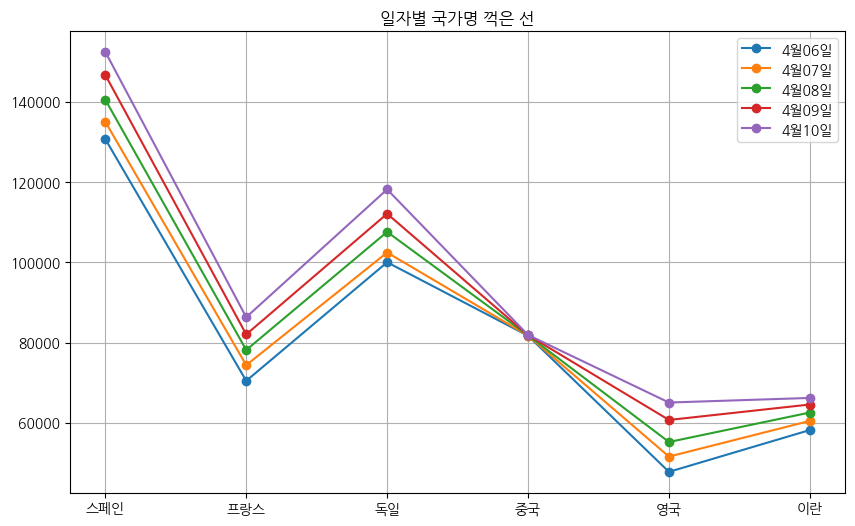

In [48]:
plt.figure(figsize=(10,6))
plt.plot(contries, '-o')
plt.title('일자별 국가명 꺽은 선')
plt.legend(contries.columns)
plt.show()

>

>